## IMPORTING LIBRARIES

In [53]:
import tensorflow 

import matplotlib.pyplot as plt

%matplotlib inline


## LOADING THE DATA

In [54]:
from tensorflow.keras.datasets import mnist

In [55]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## VISUALIZING DIGIT IMAGES

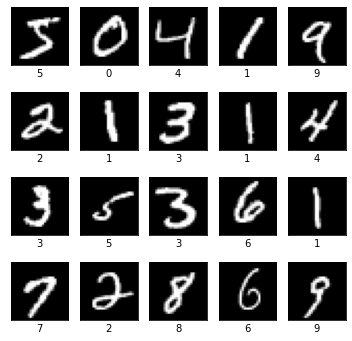

In [56]:
# TRAINING DATA

plt.figure(figsize=(6,6))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.xlabel(y_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap='gray')

## RESHAPING THE IMAGE TO FIT THE MODEL

In [57]:
x_train=x_train.reshape((x_train.shape[0],-1))

x_test=x_test.reshape((x_test.shape[0],-1))


print(x_train.shape,x_test.shape)

(60000, 784) (10000, 784)


## ONE-HOT ENCODING OF TARGET VARIABLE

In [58]:
from tensorflow.keras.utils import to_categorical


y_train=to_categorical(y_train)

y_test=to_categorical(y_test)

In [59]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## CREATING CNN MODEL

In [60]:
from tensorflow.keras.models import Sequential

model=Sequential()

from tensorflow.keras.layers import Dense,BatchNormalization,Dense


model.add(Dense(50,input_shape=(784,)))

model.add(BatchNormalization())

model.add(Dense(200,activation='relu'))

model.add(Dense(100,activation='relu'))

model.add(Dense(60,activation='relu'))

model.add(Dense(30,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])


model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 50)                39250     
_________________________________________________________________
batch_normalization_3 (Batch (None, 50)                200       
_________________________________________________________________
dense_19 (Dense)             (None, 200)               10200     
_________________________________________________________________
dense_20 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_21 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_22 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_23 (Dense)             (None, 10)               

## TRAINING THE MODEL

In [61]:
model.fit(x_train,y_train,epochs=30,verbose=1,batch_size=50)

Epoch 1/30
1200/1200 [==============================] - 6s 4ms/step - loss: 0.7672 - accuracy: 0.7761
Epoch 2/30
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2554 - accuracy: 0.9233
Epoch 3/30
1200/1200 [==============================] - 5s 4ms/step - loss: 0.1934 - accuracy: 0.9421
Epoch 4/30
1200/1200 [==============================] - 4s 4ms/step - loss: 0.1577 - accuracy: 0.9525
Epoch 5/30
1200/1200 [==============================] - 5s 4ms/step - loss: 0.1367 - accuracy: 0.9586
Epoch 6/30
1200/1200 [==============================] - 5s 4ms/step - loss: 0.1208 - accuracy: 0.9627
Epoch 7/30
1200/1200 [==============================] - 5s 4ms/step - loss: 0.1075 - accuracy: 0.9670
Epoch 8/30
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0975 - accuracy: 0.9709
Epoch 9/30
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0897 - accuracy: 0.9721
Epoch 10/30
1200/1200 [==============================] - 4s 4ms/step - loss: 0.082

In [62]:
import numpy as np

prob=model.predict(x_test)

y_pred=[]

for i in range(len(y_test)):
    y_pred.append(np.argmax(prob[i]))



## EVALUATING THE PERFORMANCE OF MODEL

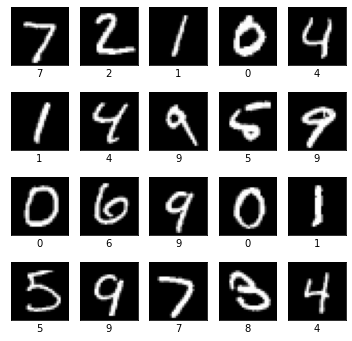

In [63]:
x_test=x_test.reshape((x_test.shape[0],28,28,1))

plt.figure(figsize=(6,6))

for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.xlabel(y_pred[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i],cmap='gray')
    